#***Water quality***


There are various features such as  temperature, acidity (pH), dissolved solids (specific conductance), particulate matter (turbidity), dissolved oxygen, hardness, and suspended sediment  to ascertain the quality of water. [1](https://www.michiganseagrant.org/lessons/lessons/by-broad-concept/earth-science/water-quality/) In this project, considering the available dataset, we take three properties into account. These three properties are: **Temperature**, **Acidity – pH**, and **Turbidity**.

**Turbidity** "is the cloudiness or haziness of a fluid caused by large numbers of individual particles that are generally invisible to the naked eye, similar to smoke in air. The measurement of turbidity is a key test of water quality." [2](https://en.wikipedia.org/wiki/Turbidity)



# Requirements

Dataset:

https://data.mendeley.com/datasets/34rczh25kc/4


In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 48.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=6a8f8c909ff5085bf765da897af70bd2d93b56f6e19dce3cf768d7f111cd438f
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
!pip install spark

     |████████████████████████████████| 41 kB 57 kB/s 
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58762 sha256=aec9cabe45edf051338b90c7ea9bb48858e3be1e8967df779d6ab5f7151ff26a
  Stored in directory: /root/.cache/pip/wheels/4e/0e/f1/164619f9920fb447d294afaae11a7715bd442ded7225953d72
Successfully built spark


Packages and frameworks:

In [ ]:
import pyspark
import spark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 

# Reading the data and give some labels

In [ ]:
#read dataset using pandas
data_pd =  pd.read_excel('Sensor data for 60 cm.xlsx')

#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()

#Create PySpark DataFrame from Pandas
spark_df = spark.createDataFrame(data_pd) 
spark_df.printSchema()
spark_df.show()

root
 |-- DateTime: string (nullable = true)
 |-- Temperature : double (nullable = true)
 |-- Turbidity: long (nullable = true)

+-------------------+------------+---------+
|           DateTime|Temperature |Turbidity|
+-------------------+------------+---------+
|2020-01-15 16:00:35|       22.54|      134|
|2020-01-15 16:01:33|       22.54|      134|
|2020-01-15 16:02:33|       22.54|      134|
|2020-01-15 16:03:22|       22.54|      134|
|2020-01-15 16:04:26|       22.54|      134|
|2020-01-15 16:05:21|       22.54|      134|
|2020-01-15 16:06:20|       22.54|      134|
|2020-01-15 16:07:17|       22.54|      134|
|2020-01-15 16:08:59|       22.54|      134|
|2020-01-15 16:10:00|       22.54|      134|
|2020-01-15 16:11:11|       22.54|      134|
|2020-01-15 16:12:30|       22.54|      134|
|2020-01-15 16:13:44|       22.54|      134|
|2020-01-15 16:14:58|       22.54|      134|
|2020-01-15 16:15:40|       22.54|      134|
|2020-01-15 16:16:43|       22.54|      134|
|2020-01-15 16:1

Read and add labels to dataset one

In [ ]:
# add label to data, considering day and night according to the dataset explaination
# day = 1  , night = 0

# Row 2-116, 811-1445, 2170-2855, 3634-4410, 5156-5885, 6554-7189, 7833-8476, 9078-9624
# Contains day time data from 6:00am to 6:00pm

# Row 117-810, 1446-2169, 2856-3633, 4411-5155, 5886-6553, 7190-7832, 8477-9077
# Contains night time data from 6:00pm to 6:00am

day_arr = np.zeros(spark_df.count())
for i in range(spark_df.count()):
  if  2 <= i <=116 or 811 <= i <=1445 or  2170 <= i <= 2855 or 3634 <= i <= 4410 or 5156 <= i <= 5885 or 6554 <= i <= 7189 or 7833 <= i <= 8476 or 9078 <= i <= 9624:
    day_arr[i]= 1
print( 'day and night array:', day_arr)


# add label to data, considering weather condition of the day according to the dataset explaination
# dry = 0  , rainy = 1

# Row 2-6148, 7462-9624:: Contains sensor data from dry day.
# Row 6149-7461:: Contains sensor data from rainy day.

weather_arr = np.zeros(spark_df.count())
for i in range(spark_df.count()):
  if  6149 <= i <= 7461:
    weather_arr[i]= 1
print( 'weather array:', weather_arr)


data_pd['DayNight']= day_arr
data_pd['weather']= weather_arr

print(data_pd)
print(data_pd.iloc[7460])

day and night array: [0. 0. 1. ... 1. 1. 1.]
weather array: [0. 0. 0. ... 0. 0. 0.]
                 DateTime  Temperature   Turbidity  DayNight  weather
0     2020-01-15 16:00:35         22.54        134       0.0      0.0
1     2020-01-15 16:01:33         22.54        134       0.0      0.0
2     2020-01-15 16:02:33         22.54        134       1.0      0.0
3     2020-01-15 16:03:22         22.54        134       1.0      0.0
4     2020-01-15 16:04:26         22.54        134       1.0      0.0
...                   ...           ...        ...       ...      ...
9618  2020-01-22 16:21:01         22.00        152       1.0      0.0
9619  2020-01-22 16:22:09         22.01        152       1.0      0.0
9620  2020-01-22 16:23:16         22.01        152       1.0      0.0
9621  2020-01-22 16:24:23         22.02        152       1.0      0.0
9622  2020-01-22 16:25:32         22.02        152       1.0      0.0

[9623 rows x 5 columns]
DateTime        2020-01-20 23:05:10
Temperature    

In [ ]:
#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[2]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()

#Create PySpark DataFrame from Pandas
spark_df_2 = spark.createDataFrame(data_pd) 
spark_df_2.printSchema()
spark_df_2.show()

root
 |-- DateTime: string (nullable = true)
 |-- Temperature : double (nullable = true)
 |-- Turbidity: long (nullable = true)
 |-- DayNight: double (nullable = true)
 |-- weather: double (nullable = true)

+-------------------+------------+---------+--------+-------+
|           DateTime|Temperature |Turbidity|DayNight|weather|
+-------------------+------------+---------+--------+-------+
|2020-01-15 16:00:35|       22.54|      134|     0.0|    0.0|
|2020-01-15 16:01:33|       22.54|      134|     0.0|    0.0|
|2020-01-15 16:02:33|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:03:22|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:04:26|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:05:21|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:06:20|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:07:17|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:08:59|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:10:00|       22.54|      134|    

In [ ]:
print(spark_df.columns)
print(spark_df_2.columns)
spark_df.select(spark_df.columns[0]).show()

['DateTime', 'Temperature ', 'Turbidity']
['DateTime', 'Temperature ', 'Turbidity', 'DayNight', 'weather']
+-------------------+
|           DateTime|
+-------------------+
|2020-01-15 16:00:35|
|2020-01-15 16:01:33|
|2020-01-15 16:02:33|
|2020-01-15 16:03:22|
|2020-01-15 16:04:26|
|2020-01-15 16:05:21|
|2020-01-15 16:06:20|
|2020-01-15 16:07:17|
|2020-01-15 16:08:59|
|2020-01-15 16:10:00|
|2020-01-15 16:11:11|
|2020-01-15 16:12:30|
|2020-01-15 16:13:44|
|2020-01-15 16:14:58|
|2020-01-15 16:15:40|
|2020-01-15 16:16:43|
|2020-01-15 16:17:14|
|2020-01-15 16:18:10|
|2020-01-15 16:19:14|
|2020-01-15 16:20:10|
+-------------------+
only showing top 20 rows



Separation of days

In [ ]:
# Loop to split different days, dates[0] = 15th Jan. and so on
dates = []
for i in range(15, 23):
    temp = spark_df_2.filter(spark_df_2.DateTime.contains("01-" + str(i))==True)
    dates.append(temp)

In [ ]:
dates

[DataFrame[DateTime: string, Temperature : double, Turbidity: bigint, DayNight: double, weather: double],
 DataFrame[DateTime: string, Temperature : double, Turbidity: bigint, DayNight: double, weather: double],
 DataFrame[DateTime: string, Temperature : double, Turbidity: bigint, DayNight: double, weather: double],
 DataFrame[DateTime: string, Temperature : double, Turbidity: bigint, DayNight: double, weather: double],
 DataFrame[DateTime: string, Temperature : double, Turbidity: bigint, DayNight: double, weather: double],
 DataFrame[DateTime: string, Temperature : double, Turbidity: bigint, DayNight: double, weather: double],
 DataFrame[DateTime: string, Temperature : double, Turbidity: bigint, DayNight: double, weather: double],
 DataFrame[DateTime: string, Temperature : double, Turbidity: bigint, DayNight: double, weather: double]]

In [ ]:
#day 15
dates[0].show()

+-------------------+------------+---------+--------+-------+
|           DateTime|Temperature |Turbidity|DayNight|weather|
+-------------------+------------+---------+--------+-------+
|2020-01-15 16:00:35|       22.54|      134|     0.0|    0.0|
|2020-01-15 16:01:33|       22.54|      134|     0.0|    0.0|
|2020-01-15 16:02:33|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:03:22|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:04:26|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:05:21|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:06:20|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:07:17|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:08:59|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:10:00|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:11:11|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:12:30|       22.54|      134|     1.0|    0.0|
|2020-01-15 16:13:44|       22.54|      134|     1.0|    0.0|
|2020-01

In [ ]:
#day 22
dates[-1].show()

+-------------------+------------+---------+--------+-------+
|           DateTime|Temperature |Turbidity|DayNight|weather|
+-------------------+------------+---------+--------+-------+
|2020-01-22 00:00:25|       20.67|      154|     0.0|    0.0|
|2020-01-22 00:01:26|       20.66|      154|     0.0|    0.0|
|2020-01-22 00:02:27|       20.65|      154|     0.0|    0.0|
|2020-01-22 00:03:34|       20.65|      154|     0.0|    0.0|
|2020-01-22 00:04:41|       20.64|      154|     0.0|    0.0|
|2020-01-22 00:05:43|       20.63|      154|     0.0|    0.0|
|2020-01-22 00:06:45|       20.62|      154|     0.0|    0.0|
|2020-01-22 00:08:45|       20.61|      154|     0.0|    0.0|
|2020-01-22 00:09:47|        20.6|      154|     0.0|    0.0|
|2020-01-22 00:10:55|       20.59|      154|     0.0|    0.0|
|2020-01-22 00:11:58|       20.58|      154|     0.0|    0.0|
|2020-01-22 00:13:06|       20.58|      154|     0.0|    0.0|
|2020-01-22 00:13:58|       20.57|      154|     0.0|    0.0|
|2020-01

Check out number of samples for each day:

In [ ]:
j = 15
print('Number of samples fo each day')
for i in range(len(dates)):
  print(str(j), 'th Jan. : ', dates[i].count())
  j = j+1

Number of samples fo each day
15 th Jan. :  472
16 th Jan. :  1336
17 th Jan. :  1439
18 th Jan. :  1541
19 th Jan. :  1440
20 th Jan. :  1282
21 th Jan. :  1247
22 th Jan. :  866


Now seperate day and night for each date

In [ ]:
# note: day = 1

dates_day = []
dates_night = []

for i in range(len(dates)):
    temp = dates[i].filter(dates[i].DayNight.contains("1")==True)
    temp_2 = dates[i].filter(dates[i].DayNight.contains("1")==False)

    dates_day.append(temp)
    dates_night.append(temp_2)

Seperate sunny days and rainy ones. We see that only day 19 and day 20 were wet.

In [ ]:
# rain = 1
rainy_dates = spark_df_2.filter(spark_df_2.weather.contains("1")==True)
rainy_dates.show()

+-------------------+------------+---------+--------+-------+
|           DateTime|Temperature |Turbidity|DayNight|weather|
+-------------------+------------+---------+--------+-------+
|2020-01-19 22:40:18|       22.56|      140|     0.0|    1.0|
|2020-01-19 22:41:18|       22.55|      140|     0.0|    1.0|
|2020-01-19 22:42:19|       22.55|      140|     0.0|    1.0|
|2020-01-19 22:43:19|       22.54|      140|     0.0|    1.0|
|2020-01-19 22:44:19|       22.53|      140|     0.0|    1.0|
|2020-01-19 22:45:19|       22.53|      140|     0.0|    1.0|
|2020-01-19 22:46:20|       22.52|      140|     0.0|    1.0|
|2020-01-19 22:47:20|       22.52|      140|     0.0|    1.0|
|2020-01-19 22:48:20|       22.51|      140|     0.0|    1.0|
|2020-01-19 22:49:22|       22.51|      140|     0.0|    1.0|
|2020-01-19 22:50:23|        22.5|      140|     0.0|    1.0|
|2020-01-19 22:51:34|        22.5|      140|     0.0|    1.0|
|2020-01-19 22:52:34|       22.49|      140|     0.0|    1.0|
|2020-01

In [ ]:
rainy_date_15 = rainy_dates.filter(rainy_dates.DateTime.contains("01-15")==True)
rainy_date_15.show()

+--------+------------+---------+--------+-------+
|DateTime|Temperature |Turbidity|DayNight|weather|
+--------+------------+---------+--------+-------+
+--------+------------+---------+--------+-------+



In [ ]:
rainy_date_16 = rainy_dates.filter(rainy_dates.DateTime.contains("01-16")==True)
rainy_date_16.show()
rainy_date_17 = rainy_dates.filter(rainy_dates.DateTime.contains("01-17")==True)
rainy_date_17.show()
rainy_date_18 = rainy_dates.filter(rainy_dates.DateTime.contains("01-18")==True)
rainy_date_18.show()
rainy_date_21 = rainy_dates.filter(rainy_dates.DateTime.contains("01-21")==True)
rainy_date_21.show()
rainy_date_22 = rainy_dates.filter(rainy_dates.DateTime.contains("01-22")==True)
rainy_date_22.show()

+--------+------------+---------+--------+-------+
|DateTime|Temperature |Turbidity|DayNight|weather|
+--------+------------+---------+--------+-------+
+--------+------------+---------+--------+-------+

+--------+------------+---------+--------+-------+
|DateTime|Temperature |Turbidity|DayNight|weather|
+--------+------------+---------+--------+-------+
+--------+------------+---------+--------+-------+

+--------+------------+---------+--------+-------+
|DateTime|Temperature |Turbidity|DayNight|weather|
+--------+------------+---------+--------+-------+
+--------+------------+---------+--------+-------+

+--------+------------+---------+--------+-------+
|DateTime|Temperature |Turbidity|DayNight|weather|
+--------+------------+---------+--------+-------+
+--------+------------+---------+--------+-------+

+--------+------------+---------+--------+-------+
|DateTime|Temperature |Turbidity|DayNight|weather|
+--------+------------+---------+--------+-------+
+--------+------------+----

In [ ]:
rainy_date_19 = rainy_dates.filter(rainy_dates.DateTime.contains("01-19")==True)
rainy_date_19.show()

+-------------------+------------+---------+--------+-------+
|           DateTime|Temperature |Turbidity|DayNight|weather|
+-------------------+------------+---------+--------+-------+
|2020-01-19 22:40:18|       22.56|      140|     0.0|    1.0|
|2020-01-19 22:41:18|       22.55|      140|     0.0|    1.0|
|2020-01-19 22:42:19|       22.55|      140|     0.0|    1.0|
|2020-01-19 22:43:19|       22.54|      140|     0.0|    1.0|
|2020-01-19 22:44:19|       22.53|      140|     0.0|    1.0|
|2020-01-19 22:45:19|       22.53|      140|     0.0|    1.0|
|2020-01-19 22:46:20|       22.52|      140|     0.0|    1.0|
|2020-01-19 22:47:20|       22.52|      140|     0.0|    1.0|
|2020-01-19 22:48:20|       22.51|      140|     0.0|    1.0|
|2020-01-19 22:49:22|       22.51|      140|     0.0|    1.0|
|2020-01-19 22:50:23|        22.5|      140|     0.0|    1.0|
|2020-01-19 22:51:34|        22.5|      140|     0.0|    1.0|
|2020-01-19 22:52:34|       22.49|      140|     0.0|    1.0|
|2020-01

In [ ]:
rainy_date_20 = rainy_dates.filter(rainy_dates.DateTime.contains("01-20")==True)
rainy_date_20.show()

+-------------------+------------+---------+--------+-------+
|           DateTime|Temperature |Turbidity|DayNight|weather|
+-------------------+------------+---------+--------+-------+
|2020-01-20 00:00:10|       22.12|      140|     0.0|    1.0|
|2020-01-20 00:01:10|       22.12|      140|     0.0|    1.0|
|2020-01-20 00:02:11|       22.11|      140|     0.0|    1.0|
|2020-01-20 00:03:11|       22.11|      140|     0.0|    1.0|
|2020-01-20 00:04:11|        22.1|      140|     0.0|    1.0|
|2020-01-20 00:05:12|       22.09|      140|     0.0|    1.0|
|2020-01-20 00:06:11|       22.09|      140|     0.0|    1.0|
|2020-01-20 00:07:12|       22.08|      140|     0.0|    1.0|
|2020-01-20 00:08:14|       22.07|      140|     0.0|    1.0|
|2020-01-20 00:09:14|       22.07|      140|     0.0|    1.0|
|2020-01-20 00:10:15|       22.06|      140|     0.0|    1.0|
|2020-01-20 00:11:15|       22.05|      140|     0.0|    1.0|
|2020-01-20 00:12:15|       22.05|      140|     0.0|    1.0|
|2020-01

# Max Min and Mean of each column


In [ ]:
spark_df_2.agg({'Turbidity': 'max'}).show(), spark_df_2.agg({'Turbidity': 'min'}).show(), spark_df_2.agg({'Turbidity': 'mean'}).show()

+--------------+
|max(Turbidity)|
+--------------+
|           154|
+--------------+

+--------------+
|min(Turbidity)|
+--------------+
|           134|
+--------------+

+------------------+
|    avg(Turbidity)|
+------------------+
|141.85399563545673|
+------------------+



(None, None, None)

In [ ]:
spark_df_2.agg({'Temperature ': 'max'}).show(), spark_df_2.agg({'Temperature ': 'min'}).show(), spark_df_2.agg({'Temperature ': 'mean'}).show()

+-----------------+
|max(Temperature )|
+-----------------+
|            24.21|
+-----------------+

+-----------------+
|min(Temperature )|
+-----------------+
|            18.08|
+-----------------+

+------------------+
| avg(Temperature )|
+------------------+
|21.512561571235505|
+------------------+



(None, None, None)

# Correlations and visualizations (First all days at once, then each day separately)

Correlation btween pairs of values without seprating days

In [ ]:
def overal_corr(input_df):

  # col1 = 'Temperature (C) ', col2 = 'Turbidity (NTU)'
  temp_tur = input_df.corr(input_df.columns[1], input_df.columns[2])
  print("Overal correlation between Temperature (C) and Turbidity (NTU): ", temp_tur)
  
overal_corr(spark_df)

Overal correlation between Temperature (C) and Turbidity (NTU):  -0.13827681730815308


Correlation btween pairs of values after seprating days

In [ ]:
j = 15

for i in range(len(dates)):
  print(str(j)+'th Jan.')
  overal_corr(dates[i])
  j = j+1  

15th Jan.
Overal correlation between Temperature (C) and Turbidity (NTU):  nan
16th Jan.
Overal correlation between Temperature (C) and Turbidity (NTU):  0.49884612367864145
17th Jan.
Overal correlation between Temperature (C) and Turbidity (NTU):  0.5476497739616554
18th Jan.
Overal correlation between Temperature (C) and Turbidity (NTU):  0.7582002192022703
19th Jan.
Overal correlation between Temperature (C) and Turbidity (NTU):  -0.5966632358640772
20th Jan.
Overal correlation between Temperature (C) and Turbidity (NTU):  -0.5825788250400655
21th Jan.
Overal correlation between Temperature (C) and Turbidity (NTU):  0.7446072872259164
22th Jan.
Overal correlation between Temperature (C) and Turbidity (NTU):  -0.42025819424315214


Normalization function:

In [ ]:
def norm_calculation(input_list, input_num):
  mean = np.mean(input_list)
  max = np.max(input_list)
  min = np.min(input_list)
  range = max - min
  normalized = (input_num - mean) / (range)
  return normalized

Day 15:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


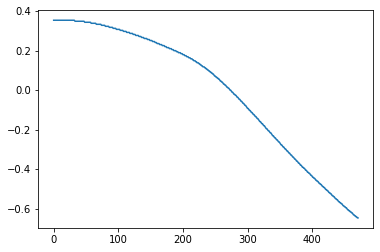

In [ ]:
# list of temperture - 15th Jan.
date_15_temperature = np.array(dates[0].select(dates[0].columns[1]).collect())

# list of turbidiy - 15th Jan.
date_15_turbidity = np.array(dates[0].select(dates[0].columns[2]).collect())


date_15_temperature_normalized =  [ norm_calculation(date_15_temperature, date_15_temperature[i]) for i in range(len(date_15_temperature))]
#date_15_temperature_normalized = preprocessing.normalize(date_15_temperature)

date_15_turbidity_normalized =  [ norm_calculation(date_15_turbidity, date_15_turbidity[i]) for i in range(len(date_15_turbidity))]
#date_15_turbidity_normalized = preprocessing.normalize(date_15_turbidity)

plt.plot(date_15_temperature_normalized)
plt.plot(date_15_turbidity_normalized)

Function to calculate and plot the correlations for each day:

In [ ]:
def correlation_of_day(day_n):

  # list of temperture of n th Jan.
  temperature = np.array(day_n.select(day_n.columns[1]).collect())

  # list of turbidiy of  n th Jan.
  turbidity = np.array(day_n.select(day_n.columns[2]).collect())

  # make the numbers normalized
  temperature_normalized =  [ norm_calculation(temperature, temperature[i]) for i in range(len(temperature))]
  turbidity_normalized =  [ norm_calculation(turbidity, turbidity[i]) for i in range(len(turbidity))]

  plt.plot(temperature_normalized, label = 'Temperature')
  plt.plot(turbidity_normalized, label = 'Turbidity')
  plt.legend(bbox_to_anchor=(1.1, 1.05))

Before seperating the days:

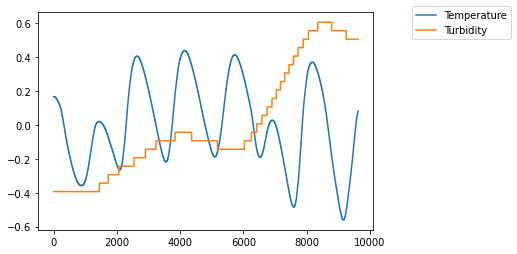

In [ ]:
correlation_of_day(spark_df)

Day 16

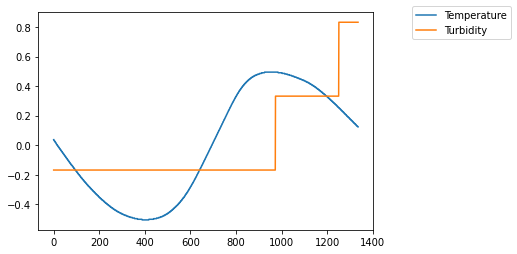

In [ ]:
correlation_of_day(dates[1])

Day 17

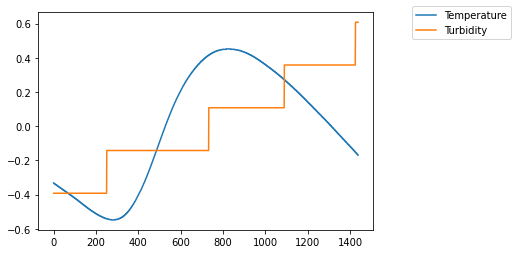

In [ ]:
correlation_of_day(dates[2])

Day 18

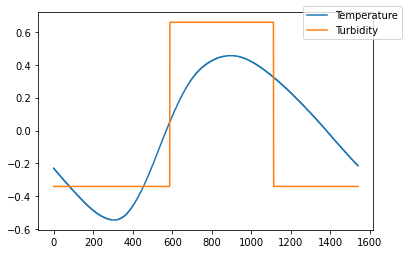

In [ ]:
correlation_of_day(dates[3])

Day 19

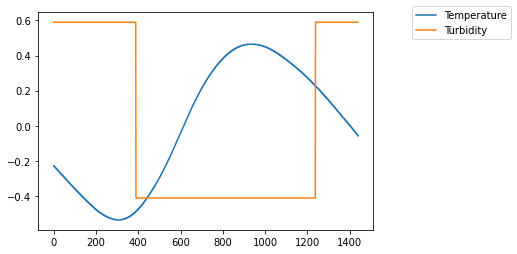

In [ ]:
correlation_of_day(dates[4])

Day 20

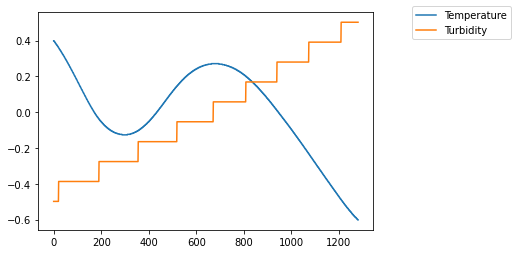

In [ ]:
correlation_of_day(dates[5])

Day 21

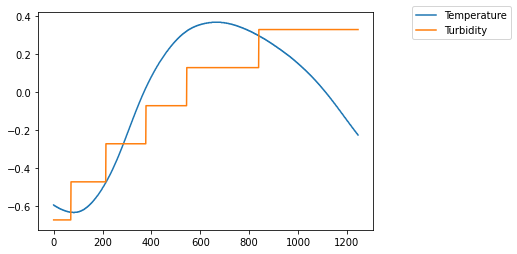

In [ ]:
correlation_of_day(dates[6])

Day 22

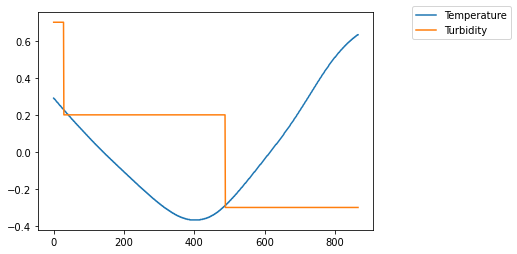

In [ ]:
correlation_of_day(dates[7])

**Comparing two days** with each other

In the following, it can be seen that the turbidity is going to be high in a rainy day. 

However, it is not always like that. In day 17, where the weather is sunny, the turbidity has been high too.

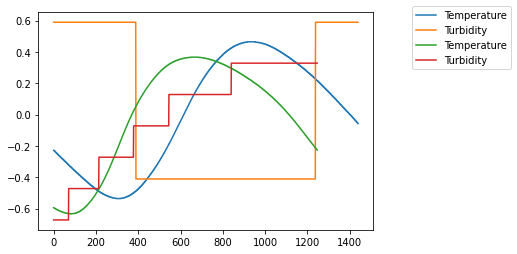

In [ ]:
# rainy day --> 19
correlation_of_day(dates[4])
correlation_of_day(dates[6])

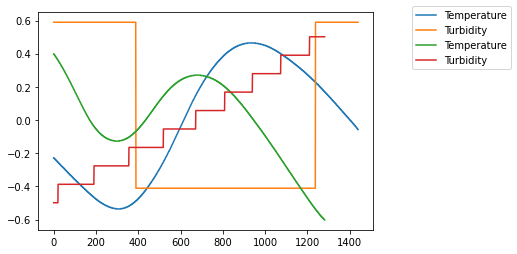

In [ ]:
# rainy day --> 19, 20
correlation_of_day(dates[4])
correlation_of_day(dates[5])

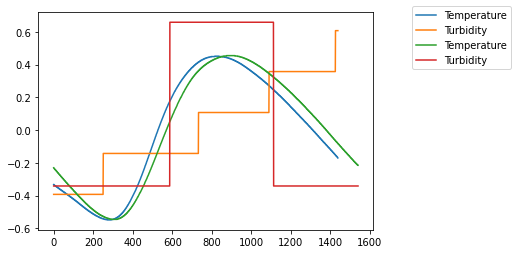

In [ ]:
# both sunny days
correlation_of_day(dates[2])
correlation_of_day(dates[3])

# Correlations and visualizations (Considering day and night)

In [ ]:
j = 15
for i in range(len(dates)):
  print(str(j)+ ' Jan. - day')
  overal_corr(dates_day[i])
  print('\n'+ str(j) + 'th Jan. - night ')
  overal_corr(dates_night[i])
  print('------------------')
  j = j+1

15 Jan. - day
Overal correlation between Temperature (C) and Turbidity (NTU):  nan

15th Jan. - night 
Overal correlation between Temperature (C) and Turbidity (NTU):  nan
------------------
16 Jan. - day
Overal correlation between Temperature (C) and Turbidity (NTU):  0.05644225537092429

16th Jan. - night 
Overal correlation between Temperature (C) and Turbidity (NTU):  0.7376207904224502
------------------
17 Jan. - day
Overal correlation between Temperature (C) and Turbidity (NTU):  0.6762106949053209

17th Jan. - night 
Overal correlation between Temperature (C) and Turbidity (NTU):  0.8220744291262351
------------------
18 Jan. - day
Overal correlation between Temperature (C) and Turbidity (NTU):  0.8065254575181735

18th Jan. - night 
Overal correlation between Temperature (C) and Turbidity (NTU):  nan
------------------
19 Jan. - day
Overal correlation between Temperature (C) and Turbidity (NTU):  -0.3245584841790601

19th Jan. - night 
Overal correlation between Temperature (C

Day 15 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


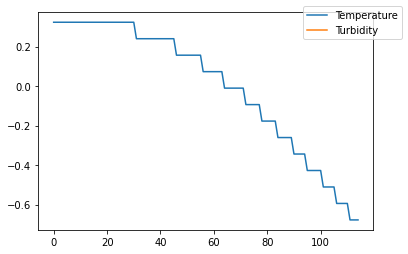

In [ ]:
correlation_of_day(dates_day[0])

The range of Turbidity in day 15 is equal to zero which causes nan...

In [ ]:
test = dates_day[0].filter(dates_day[0].Turbidity.contains('197') == True)
test.show()

+--------+------------+---------+--------+-------+
|DateTime|Temperature |Turbidity|DayNight|weather|
+--------+------------+---------+--------+-------+
+--------+------------+---------+--------+-------+



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


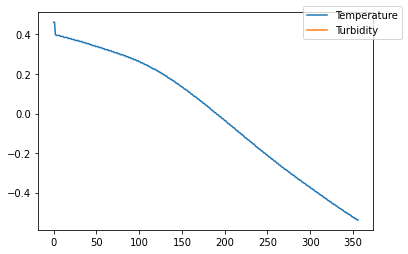

In [ ]:
correlation_of_day(dates_night[0])

Day 16

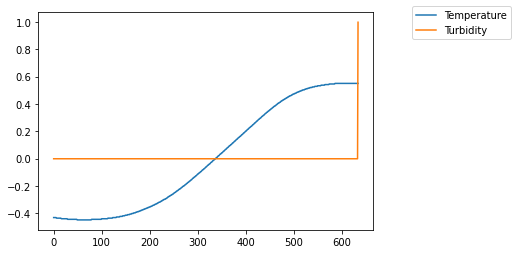

In [ ]:
correlation_of_day(dates_day[1])

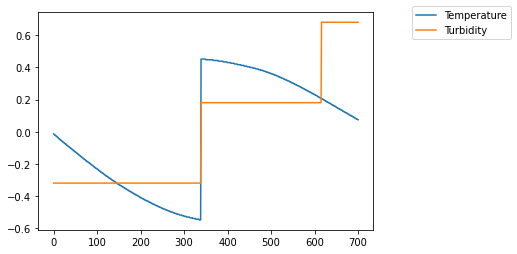

In [ ]:
correlation_of_day(dates_night[1])

Day 17

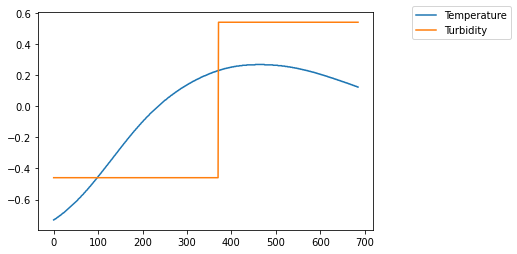

In [ ]:
correlation_of_day(dates_day[2])

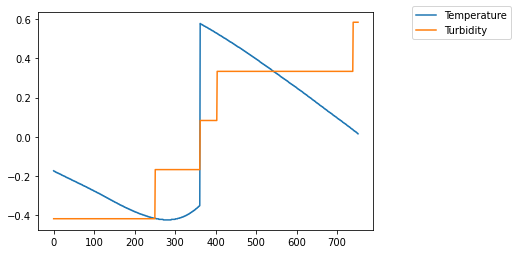

In [ ]:
correlation_of_day(dates_night[2])

Day 18

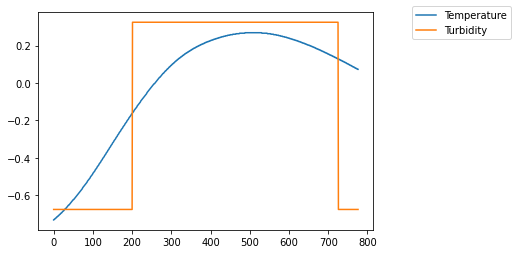

In [ ]:
correlation_of_day(dates_day[3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


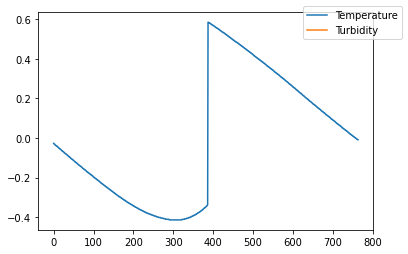

In [ ]:
correlation_of_day(dates_night[3])

Day 19

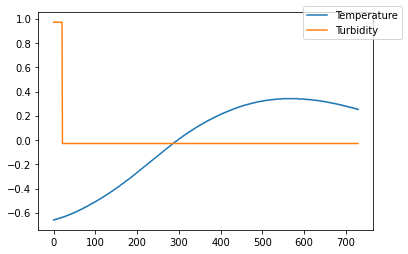

In [ ]:
correlation_of_day(dates_day[4])

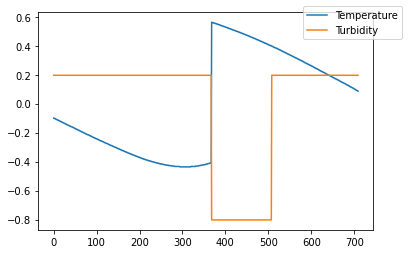

In [ ]:
correlation_of_day(dates_night[4])

Day 20

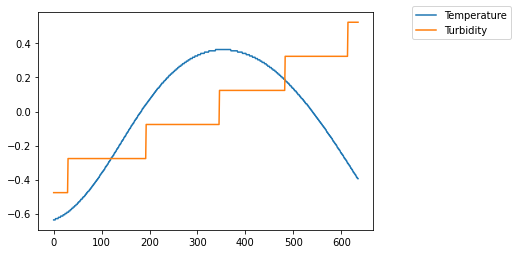

In [ ]:
correlation_of_day(dates_day[5])

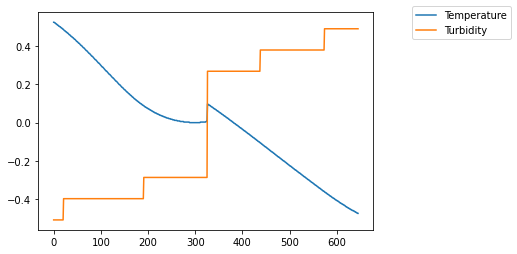

In [ ]:
correlation_of_day(dates_night[5])

Day 21

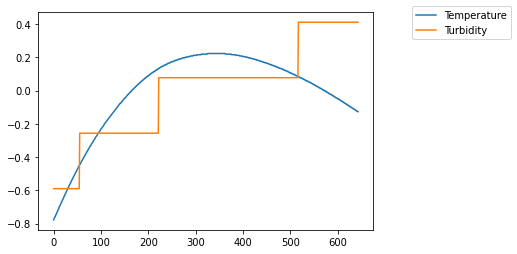

In [ ]:
correlation_of_day(dates_day[6])

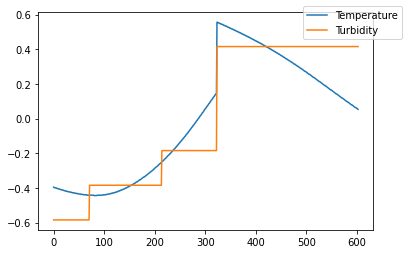

In [ ]:
correlation_of_day(dates_night[6])

Day 22

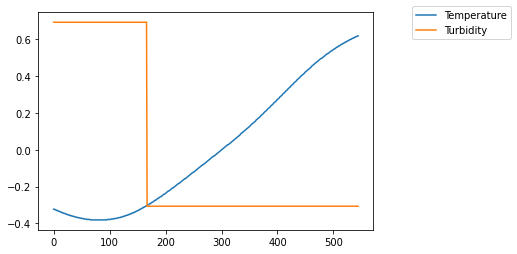

In [ ]:
correlation_of_day(dates_day[7])

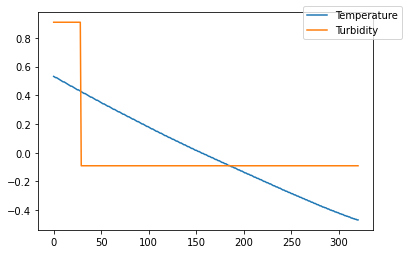

In [ ]:
correlation_of_day(dates_night[7])

# Build Test and Train data and fit regression model

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

First, I will take 60 as step by supposing that 60 minutes will be considered to predict next stage.

In [ ]:
#read dataset using pandas
data_pd =  pd.read_excel('Sensor data for 60 cm.xlsx')
print(data_pd)
# one sample 
print(data_pd.iloc[0])

# put data into array - [ [Temperature_1, turbidity_1], ... ,  [Temperature_n, turbidity_n]]
data_pd_array = [[data_pd.iloc[i][1] , data_pd.iloc[i][2]] for i in range(len(data_pd))]
print('\nFirst sample of data array consist of all parameters: ' ,data_pd_array[0])

# put data into array - [Temperature]
data_pd_array_temperature = [data_pd.iloc[i][1] for i in range(len(data_pd))]
print('\nFirst sample of data array consist of temperature: ' ,data_pd_array_temperature[0])

# put data into array - [Turbidity]
data_pd_array_turb = [data_pd.iloc[i][2] for i in range(len(data_pd))]
print('\nFirst sample of data array consist of turbidity ' ,data_pd_array_turb[0])


# function to build x as input and y as label with the current data
# each index of x consists of 60 array with 3 cells

def x_y_builder(array):
  x = []
  y = []

  for i in range(60, len(array)):
    x.append(array[i-60 : i])
    y.append(array[i])

  return x, y


# x for triple with label
x, y = x_y_builder(data_pd_array)

# x temperature with label
x_temperature, y_temperature = x_y_builder(data_pd_array_temperature)

# x turbidity with label
x_turb, y_turb = x_y_builder(data_pd_array_turb)

                 DateTime  Temperature   Turbidity
0     2020-01-15 16:00:35         22.54        134
1     2020-01-15 16:01:33         22.54        134
2     2020-01-15 16:02:33         22.54        134
3     2020-01-15 16:03:22         22.54        134
4     2020-01-15 16:04:26         22.54        134
...                   ...           ...        ...
9618  2020-01-22 16:21:01         22.00        152
9619  2020-01-22 16:22:09         22.01        152
9620  2020-01-22 16:23:16         22.01        152
9621  2020-01-22 16:24:23         22.02        152
9622  2020-01-22 16:25:32         22.02        152

[9623 rows x 3 columns]
DateTime        2020-01-15 16:00:35
Temperature                   22.54
Turbidity                       134
Name: 0, dtype: object

First sample of data array consist of all parameters:  [22.54, 134]

First sample of data array consist of temperature:  22.54

First sample of data array consist of turbidity  134


In [ ]:
# X_train_2d = np.reshape(X_train, (?!))
# y_train_2d = np.reshape(y_train, (?!))

In [ ]:
def fit_reg(x, y):
  # shuffle
  # test train split of triples data
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, shuffle=True)

  print('x train\'s shape:', np.shape(X_train))
  print('y train\'s shape: ' , np.shape(y_train))

  print('x test\'s shape:', np.shape(X_test))
  print('y test\'s shape: ' , np.shape(y_test))

  reg = LinearRegression().fit(X_train, y_train)
  print("\nAccuracy of model: " , reg.score(X_test, y_test))

  return reg, X_test , y_test

x train's shape: (7650, 60)
y train's shape:  (7650,)
x test's shape: (1913, 60)
y test's shape:  (1913,)

Accuracy of model:  0.9999102431919039


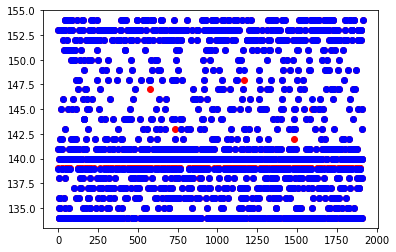

In [ ]:
reg_turb, X_test_turb, y_test_turb = fit_reg(x_turb,y_turb)

plt.plot(reg_turb.predict(X_test_turb), 'ro')
plt.plot(y_test_turb, 'bo')

x train's shape: (7650, 60)
y train's shape:  (7650,)
x test's shape: (1913, 60)
y test's shape:  (1913,)

Accuracy of model:  0.9999959242929988


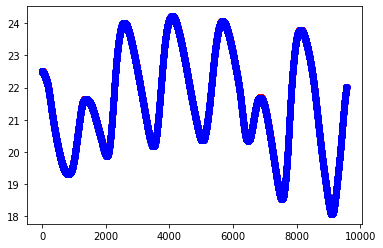

In [ ]:
reg_temp, X_test_temp, y_test_temp = fit_reg(x_temperature , y_temperature)
plt.plot(reg_turb.predict(x_temperature), 'ro')
plt.plot(y_temperature, 'bo')

# Fit LSTM

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.utils import shuffle

In [ ]:
#read dataset using pandas
data_pd =  pd.read_excel('Sensor data for 60 cm.xlsx')
print(data_pd)
# one sample 
print(data_pd.iloc[0])

# put data into array - [ [Temperature_1,  turbidity_1], ... ,  [Temperature_n, turbidity_n]]
data_pd_array = [[data_pd.iloc[i][1] , data_pd.iloc[i][2]] for i in range(len(data_pd))]
print('\nFirst sample of data array consist of all parameters: ' ,data_pd_array[0])

# put data into array - [Temperature]
data_pd_array_temperature = [data_pd.iloc[i][1] for i in range(len(data_pd))]
print('\nFirst sample of data array consist of temperature: ' ,data_pd_array_temperature[0])

# put data into array - [Turbidity]
data_pd_array_turb = [data_pd.iloc[i][2] for i in range(len(data_pd))]
print('\nFirst sample of data array consist of turbidity ' ,data_pd_array_turb[0])


# function to build x as input and y as label with the current data
# each index of x consists of 60 array with 3 cells

def x_y_builder(inputArray):
    x = []
    y = []
    inputArray = np.array(inputArray)
    scaler = MinMaxScaler()
    inputArray[:, 0] = scaler.fit_transform(np.expand_dims(inputArray[:, 0], axis=-1))[:, 0]

    scaler = MinMaxScaler()
    inputArray[:, 1] = scaler.fit_transform(np.expand_dims(inputArray[:, 1], axis=-1))[:, 0]

 #   scaler = MinMaxScaler()
 #   inputArray[:, 2] = scaler.fit_transform(np.expand_dims(inputArray[:, 2], axis=-1))[:, 0]

    print(
        min(inputArray[:, 0]), min(inputArray[:, 1]),
        max(inputArray[:, 0]), max(inputArray[:, 1])
    )
    

    for i in range(60, len(inputArray)):
        x.append(inputArray[i-60 : i])
        y.append(inputArray[i])

    return x, y


                 DateTime  Temperature   Turbidity
0     2020-01-15 16:00:35         22.54        134
1     2020-01-15 16:01:33         22.54        134
2     2020-01-15 16:02:33         22.54        134
3     2020-01-15 16:03:22         22.54        134
4     2020-01-15 16:04:26         22.54        134
...                   ...           ...        ...
9618  2020-01-22 16:21:01         22.00        152
9619  2020-01-22 16:22:09         22.01        152
9620  2020-01-22 16:23:16         22.01        152
9621  2020-01-22 16:24:23         22.02        152
9622  2020-01-22 16:25:32         22.02        152

[9623 rows x 3 columns]
DateTime        2020-01-15 16:00:35
Temperature                   22.54
Turbidity                       134
Name: 0, dtype: object

First sample of data array consist of all parameters:  [22.54, 134]

First sample of data array consist of temperature:  22.54

First sample of data array consist of turbidity  134


In [ ]:
x, y = x_y_builder(data_pd_array)
x = np.array(x)
y = np.array(y)
x.shape, y.shape

0.0 0.0 1.0 1.0


((9563, 60, 2), (9563, 2))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, shuffle=True)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train, y_train = shuffle(X_train, y_train)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7650, 60, 2), (7650, 2), (1913, 60, 2), (1913, 2))

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='modelWeight/',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

def buildModel():
    input_layer = tf.keras.layers.Input(shape=(60,2))
    x_ = tf.keras.layers.LSTM(64, return_sequences=True)(input_layer)
    x_ = tf.keras.layers.LSTM(64, return_sequences=True)(x_)
    x_ = tf.keras.layers.LSTM(32)(x_)
    x_ = tf.keras.layers.Dense(32, activation='relu')(x_)
    x_ = tf.keras.layers.Dense(2, activation='sigmoid')(x_)
    model = tf.keras.Model(inputs=input_layer, outputs=x_)
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    return model

In [ ]:
model = buildModel()
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=64, epochs=50, callbacks=[model_checkpoint_callback])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 2)]           0         
                                                                 
 lstm (LSTM)                 (None, 60, 64)            17152     
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 63,714
Trainable params: 63,714
Non-trainable p

In [ ]:
model.load_weights('modelWeight/')
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)

2.7144264095113613e-05


In [ ]:
predicts= model.predict(X_test)

predicts_temp = [predicts[i][0] for i in range(len(X_test))]
predicts_turb = [predicts[i][1] for i in range(len(X_test))]

label_temp = [y_test[i][0] for i in range(len(X_test))]
label_turb = [y_test[i][1] for i in range(len(X_test))]

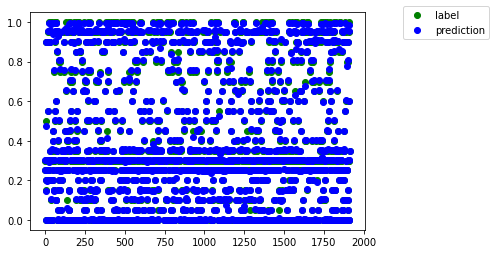

In [ ]:
plt.plot(label_turb, 'go' , label= 'label')
plt.plot(predicts_turb,'bo', label = 'prediction')
plt.legend(bbox_to_anchor=(1.1, 1.05))

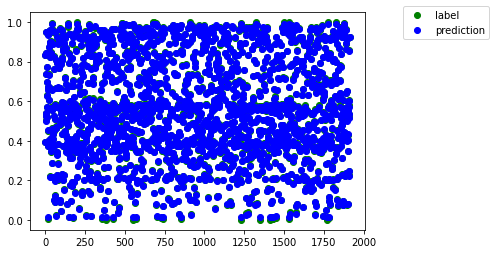

In [ ]:
plt.plot(label_temp, 'go' , label= 'label' )
plt.plot(predicts_temp,'bo', label = 'prediction' )
plt.legend(bbox_to_anchor=(1.1, 1.05))

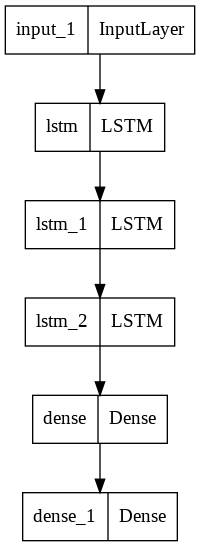

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)